#LABORATORIO 6 - APRENDIZAJE NO SUPERVISADO
##Integrantes
* Jhamil Crespo Rejas
* Daniel Andree Arancibia
* Fabricio Liceras


##Importacion de Librerias

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os # modulo para interactuar con el sistema operativo (lextura y escritura de archivos)
import numpy as np #Cálculo científico y vectorial para python
import pandas as pd #para la manipulacion y analisis de datos
from sklearn.model_selection import train_test_split # para dividir conjuntos de datos en entrenamiento y prueba
from sklearn.preprocessing import OrdinalEncoder #para codificar variables categoricas como numeros enteros
import matplotlib.pyplot as plt #para la creacion de graficos y visualizaciones
from sklearn.cluster import KMeans #para realizar el clustering para el aprendizaje no supervisado


##Preprocesamiento del Dataset

El dataset con el que trabajamos contiene datos bancarios basicos y mucha informacion relacionada con el credito que una empresa ha recopilado a lo largo de los años.

Link:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification

Lo que se busca con este dataset es clasificar el puntaje crediticio de un cliente en base a su informacion bancaria.

In [3]:
#Lectura del dataset
url = "/content/gdrive/MyDrive/Laboratorio 6 - IA/train.csv"
dataframe = pd.read_csv(url)
print(dataframe)

# Lista de nombres de columnas
column_names = [
    'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
    'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
    'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Score'
]

# Convertimos todos los valores categoricos en valores numericos
ordinal_encoder = OrdinalEncoder()

for columna in column_names: # Iterar sobre cada columna
    columna_n = dataframe[columna].values.reshape(-1, 1) #seleccionamos la columna actual
    dataframe[columna] = ordinal_encoder.fit_transform(columna_n) #convierte a enteros

#caso especial con tipo de datso mezclado
dataframe['Monthly_Balance'] = dataframe['Monthly_Balance'].astype(str) #convertimos todos los datos a tipo string
Monthly_Balance = dataframe[['Monthly_Balance']]
dataframe['Monthly_Balance'] = ordinal_encoder.fit_transform(Monthly_Balance) #asignamos valores numericos equivalentes


#eliminamos las filas con valores nulos
dataframe.dropna(inplace=True)
print(dataframe.isnull().sum())

dataframe.describe()

<ipython-input-3-7189d2c90e9f>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv(url)


            ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,...,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000,53744.000000
mean,49903.182532,6255.402557,3.498772,5088.570147,539.633987,5875.072231,7.528022,9617.135773,6469.766318,12.426857,...,1.553662,6549.290600,49544.077348,194.565421,1.440291,6016.121372,47607.945854,3.499926,48523.765946,1.364394
std,28955.998645,3612.785904,2.288953,2921.098227,260.339346,3780.162053,4.638052,5459.535611,3816.731246,60.470872,...,1.038772,3717.814763,28680.345316,113.868016,0.696781,3578.069458,27417.544385,2.034717,28455.612724,0.745711
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,24676.500000,3121.000000,2.000000,2570.000000,339.000000,2556.000000,3.000000,4909.000000,3146.000000,5.000000,...,1.000000,3449.000000,24796.500000,100.000000,1.000000,2942.000000,23859.750000,2.000000,23818.250000,1.000000
50%,49920.000000,6272.000000,3.000000,5070.000000,531.000000,5856.000000,7.000000,9690.000000,6467.000000,7.000000,...,2.000000,6450.000000,49510.500000,177.000000,2.000000,5932.000000,47828.000000,4.000000,47384.000000,2.000000
75%,74962.250000,9373.000000,5.000000,7649.000000,723.000000,9129.000000,12.000000,14363.000000,9740.000000,9.000000,...,2.000000,9690.000000,74299.250000,294.000000,2.000000,8972.250000,71578.250000,6.000000,72918.250000,2.000000
max,99997.000000,12499.000000,7.000000,10138.000000,1787.000000,12500.000000,15.000000,18939.000000,13234.000000,942.000000,...,3.000000,13176.000000,99998.000000,403.000000,2.000000,14949.000000,91048.000000,6.000000,98792.000000,2.000000


In [4]:
# Verificar el resultado
print(dataframe)

            ID  Customer_ID  Month    Name    Age      SSN  Occupation  \
0      16406.0      12320.0    3.0    84.0  308.0  10205.0        12.0   
6      16476.0      12320.0    4.0    84.0  308.0  10205.0        12.0   
8      16542.0       1066.0    3.0  7491.0  450.0     53.0        15.0   
9      16553.0       1066.0    2.0  7491.0  429.0     53.0        13.0   
10     16564.0       1066.0    6.0  7491.0  429.0     53.0        13.0   
...        ...          ...    ...     ...    ...      ...         ...   
99994  62787.0       8833.0    6.0  6528.0  364.0   1009.0         9.0   
99995  62788.0       8833.0    0.0  6528.0  364.0   1009.0         9.0   
99996  62789.0       8833.0    7.0  6528.0  364.0   1009.0         9.0   
99997  62790.0       8833.0    5.0  6528.0  364.0   1009.0         9.0   
99999  62792.0       8833.0    1.0  6528.0  364.0   1009.0         9.0   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0             6011.0                 397

Dividimos el dataframe en dos conjuntos, las caracteristicas y las etiquetas

In [5]:
y = dataframe['Credit_Score']
X = dataframe.drop(columns=['Credit_Score'])

Observamos cuantas clase hay en Y

In [6]:
labels = y.unique()

#Mostramos la lista de valores unicos y la cantidad de estos
print(labels)
print(len(labels))

[0. 2. 1.]
3


In [7]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Observamos la cantidad de ejemplos que quedaron para entrenamiento y para prueba

In [8]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

42995
42995
10749
10749


##Clustering

###Prueba de clustering


Pasamos los datos a array numpy para realizar una prueba de clustering y observar que tan bien agrupa nuestros datos basandonos en las etiquetas reales del dataset.

In [9]:
X_trainNp = X_train.values
y_trainNp= y_train.values

In [10]:
X_testNp = X_test.values
y_testNp= y_test.values

In [11]:
kmeans = KMeans(n_clusters=3, init="random", n_init=20, #se ejecutara 10 veces con diferentes centros iniciales, la mejor se seleccionara
                              algorithm="full", random_state=11)
kmeans.fit(X_trainNp) #se ajusta el modelo con la mejor solucion

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=3, n_init=20,
       random_state=11)

In [12]:
y_pred = kmeans.predict(X_trainNp)
print('Precisión de entrenamiento: %f' % (np.mean(y_pred == y_trainNp) * 100))

Precisión de entrenamiento: 35.050587


In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X_trainNp, kmeans.labels_) #calcula el puntaje de silueta basado en las etiquetas

0.17732884978700345

###Analisis para escoger la mejor cantidad de grupos para realizar el clustering

Creamos 9 modelos K-means con diferentes cantidades de clusters (1 - 9) para encontrar el numero de clusters adecuado.

Este analisis lo hacemos en base a el coeficiente de silueta de los modelos que es un indicativo de cuan bien agrupados estan los datos. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

Para el primer grafico utilizamos el coeficiente de silueta de todo el modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

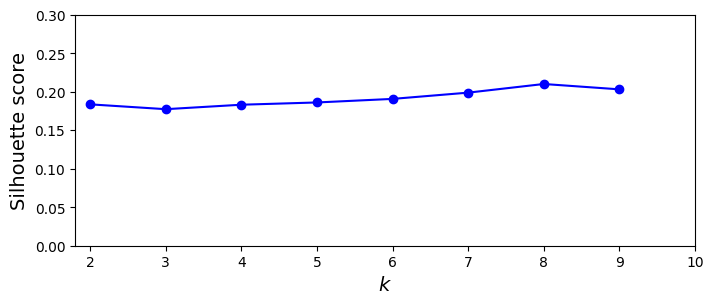

In [14]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=10, algorithm="full", random_state=11).fit(X_trainNp)
                for k in range(1, 10)] #se crea una lista de modelos k-means, uno por cada numero de clusters (1-9)

silhouette_scores = [silhouette_score(X_trainNp, model.labels_)
                     for model in kmeans_per_k[1:]] #se calculan los puntajes de silueta para todos los modelos

plt.figure(figsize=(8, 3)) #se crea una figura de 8x3 pulgadas
plt.plot(range(2, 10), silhouette_scores, "bo-") #se grafican los puntajes de silueta con puntos azules
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.0, 0.0, 0.30]) #se establece el rago para el eje x y el eje y
plt.show()

Para el segundo grafico utilizamos el coeficiente de silueta de cada cluster en los modelos, eso nos ayuda a ver que tan equilibrados y estables estan los agrupamientos en los clusters de los modelos.

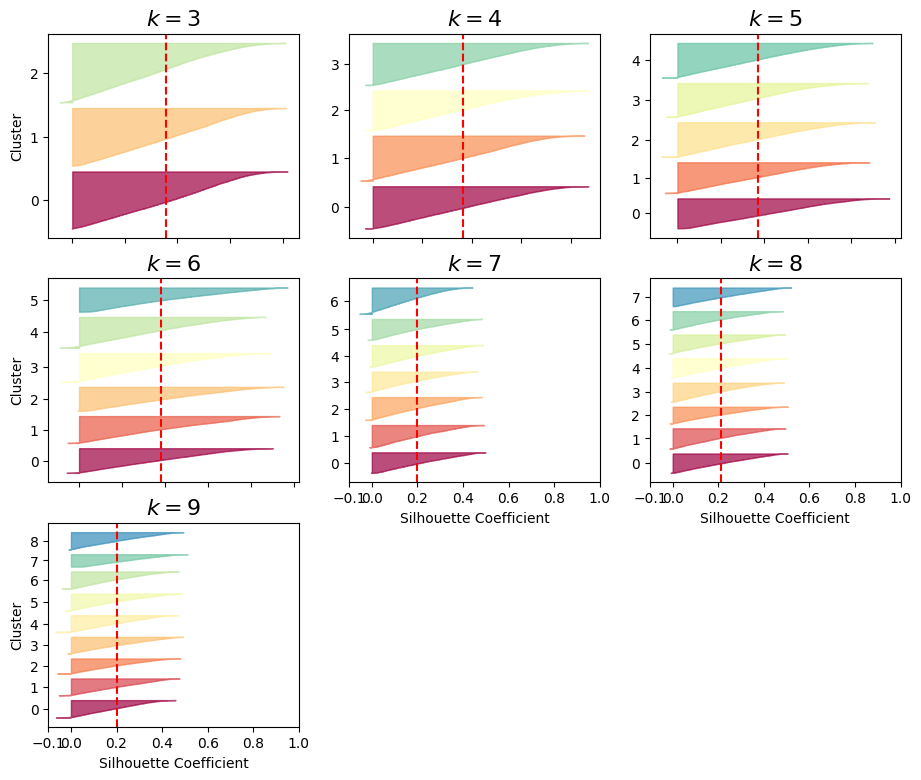

In [15]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))#crea una figura de 11x9 pulgadas

n_rows = 3  # número de filas en la cuadrícula de subgráficos
n_cols = 3  # número de columnas en la cuadrícula de subgráficos

for k in (3, 4, 5, 6, 7, 8, 9): #se itera por los valores de k (numero de clusters)
    index = k - 3  # calcula el índice correcto para el subgráfico
    plt.subplot(n_rows, n_cols, index + 1) #crea un subgrafico para cada uno

    y_pred = kmeans_per_k[k - 1].labels_#se obtienen las etiquetas
    silhouette_coefficients = silhouette_samples(X_trainNp, y_pred)#se calculan los coeficientes de las siluetas para cada muestra

    padding = len(X_trainNp) // 30 #se establece un espacio entre los graficos de silueta de cada cluster
    pos = padding
    ticks = [] #cada tick representara el centro de un cluster
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i] #se seleccionan los coeficientes correspondiente al cluster i
        coeffs.sort() #se ordenan los coeficientes

        color = mpl.cm.Spectral(i / k)#se asigna un color a cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)#se crea un grafico para los coeficientes
        ticks.append(pos + len(coeffs) // 2)#se adiciona la posicion del centro del area de silueta
        pos += len(coeffs) + padding #se actualiza la posicion para el siguiente cluster

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")#se dibuja una linea con el valor medio del coeficiente de silueta
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

##Aprendizaje Semi-Supervizado

Para el aprendizaje semi-supervizado primero creamos un modelo de K-means para 1000 clusters y ajustamos los datos en base a esos grupos.

In [16]:
from sklearn.cluster import KMeans

k = 1000 #establece el numero de clusters (grupos)
kmeans = KMeans(n_clusters=k, random_state=42) #incializa el modelo
X_digits_dist = kmeans.fit_transform(X_train)#calcula las distancias de los datos a todos los centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Una vez realizado el clustering, obtenemos los ejemplos mas representativos para cada uno de los clusters ademas de sus respectivas etiquetas verdaderas.

In [17]:
idxs = np.argmin(X_digits_dist, axis=0)#calcula los indices de las distancias minimas para cada columna
X_representative_digits = X_train.values[idxs]#devuleve las muestras mas representativas por cada columna

Realizamos la clasificacion manual para esos ejemplos mas representativos

In [18]:
y_representative_digits = y_train.values[idxs]#identifica los labels correspondientes a las muestras mas representativas

Se realiza una prueba de entrenamiento de un modelo de regresion logistica con one vs all con los datos mas representativos y se hace una prueba de precision.

In [19]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea un modelo de regresion logistica con one vs all
%time log_reg2.fit(X_representative_digits, y_representative_digits)#entrena un modelo con los datos y labels representativos
log_reg2.score(X_test, y_test)#muestra la presicion del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 3.12 s, sys: 2.26 s, total: 5.38 s
Wall time: 2.84 s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.5275839612987254

Tambien se realiza un entrenamiento de otro modelo del mismo tipo del anterior pero directamente con las etiquetas reales del dataset.

In [20]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea otro modelo de regresion logistica con one vs all
%time log_reg.fit(X_train, y_train)#entrena el modelo con los datos y labels correspondientes reales
log_reg.score(X_test, y_test)

CPU times: user 45.7 s, sys: 21.8 s, total: 1min 7s
Wall time: 44.7 s


0.5743790120011164

Segun las etiquetas mas representativas ya clasificadas manualmente hacemos una proparagacion en base a su etiqueta a todos los demas ejemplos de sus clusters.

In [21]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]#se asigna la etiqueta representativa a todas las muestras que pertenecen al cluster i

Luego entrenamos otro modelo con esas etiquetas propagadas y vemos su presicion

In [22]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)#crea el tercer modelo de regresion logistica con one vs all
%time log_reg3.fit(X_train, y_train_propagated)#entrena el modelo con 1000 datos de entrenamiento y sus Y's correspondientes pero ya modifcadas en base a las y representativas
log_reg3.score(X_test, y_test)#calcula la presicion del modelo

CPU times: user 36.7 s, sys: 16.2 s, total: 52.9 s
Wall time: 32 s


0.5189319936738301

##Aprendizaje Activo

Identificamos las muestras con las que el modelo tiene más dificultades para clasificar correctamente

In [23]:
probas = log_reg3.predict_proba(X_train)#se obtienen las probabilidades de que las primeras 1000 muestras pertenezcan a cada clase posible
labels_ixs = np.argmax(probas, axis=1)#obtiene el indice de la probabilidad maxima (la clase mas probable) por cada muestra
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])#se obtiene la probabilidad maxima de cada muestra
sorted_ixs = np.argsort(labels) #se ordenan los indices de las muestras por sus probabilidades en orden ascendente(las primeras seran las entradas con menores probabilidades maximas)
labels[sorted_ixs[:10]]#se muestran las 10 muestras con las menores probabilidades maximas

array([0.33654364, 0.33808251, 0.33968933, 0.34287408, 0.34401184,
       0.34445041, 0.34533734, 0.34636885, 0.34643052, 0.34643777])

In [26]:
y_lowest = y_train.values[:][sorted_ixs[:k]] #obtiene las etiquetas de las k muestras con las menores probabilidades maximas de ser clasificadas correctamente
y_lowest

array([0., 2., 2., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 2., 2., 0.,
       2., 2., 1., 2., 1., 0., 2., 0., 2., 2., 2., 0., 0., 0., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 0., 2., 2., 2., 2., 2., 2., 0., 1.,
       2., 0., 2., 0., 0., 0., 0., 2., 2., 0., 0., 2., 0., 0., 2., 0., 2.,
       2., 2., 2., 0., 2., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2.,
       1., 0., 1., 2., 1., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 0., 1., 2., 0., 2., 2., 2., 2., 0., 1., 2., 2.,
       2., 0., 2., 0., 2., 2., 0., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 2., 2., 0., 0., 1., 0., 0., 0., 2., 2., 1., 2., 0., 1., 2.,
       1., 2., 2., 0., 2., 1., 1., 2., 0., 0., 0., 0., 2., 2., 2., 2., 2.,
       0., 1., 2., 2., 2., 2., 2., 0., 2., 2., 2., 0., 0., 2., 2., 0., 0.,
       2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 1., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 0., 0., 2., 2.,
       2., 2., 1., 0., 2.

In [27]:
y_train2 = y_train_propagated.copy()#copia las filas de las y propagadas
y_train2[sorted_ixs[:k]] = y_lowest

In [28]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train, y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 33.9 s, sys: 14.6 s, total: 48.5 s
Wall time: 30.5 s


0.5269327379291097